In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import pytz
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
#импорт необходимых библиотек, модулей и функций

In [2]:
df = pd.read_csv('SolarPrediction.csv', parse_dates=['Data']) #чтение набора данных

In [3]:
df.shape #проверка размеров датасета

(32686, 11)

In [4]:
df.head() #вывод первых 5 строк набора данных

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


# Первичный анализ

The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results
The date in yyyy-mm-dd format
The local time of day in hh:mm:ss 24-hour format
The numeric data, if any (may be an empty string)
The text data, if any (may be an empty string)

The units of each dataset are:

Solar radiation: watts per meter^2

Temperature: degrees Fahrenheit

Humidity: percent

Barometric pressure: Hg

Wind direction: degrees

Wind speed: miles per hour

Sunrise/sunset: Hawaii time

In [3]:
df.columns = ['UNIX_Время','Дата','Время','Радиация', 'Температура', 'Давление', 'Влажность', 
              'Направление_ветра', 'Скорость_ветра', 'Время_восхода', 'Время_заката']

In [4]:
df.head()

,UNIX_Время,Дата,Время,Радиация,Температура,Давление,Влажность,Направление_ветра,Скорость_ветра,Время_восхода,Время_заката
0,1475229326,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [15]:
df.describe() #описание имеющихся признаков

,UNIX_Время,Радиация,Температура,Давление,Влажность,Направление_ветра,Скорость_ветра
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [4]:
df.isna().sum() #проверка на отсутствующие значения

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [5]:
df.isnull().sum() # проверка на нулевые значения

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F4A259148>,
      dtype=object)

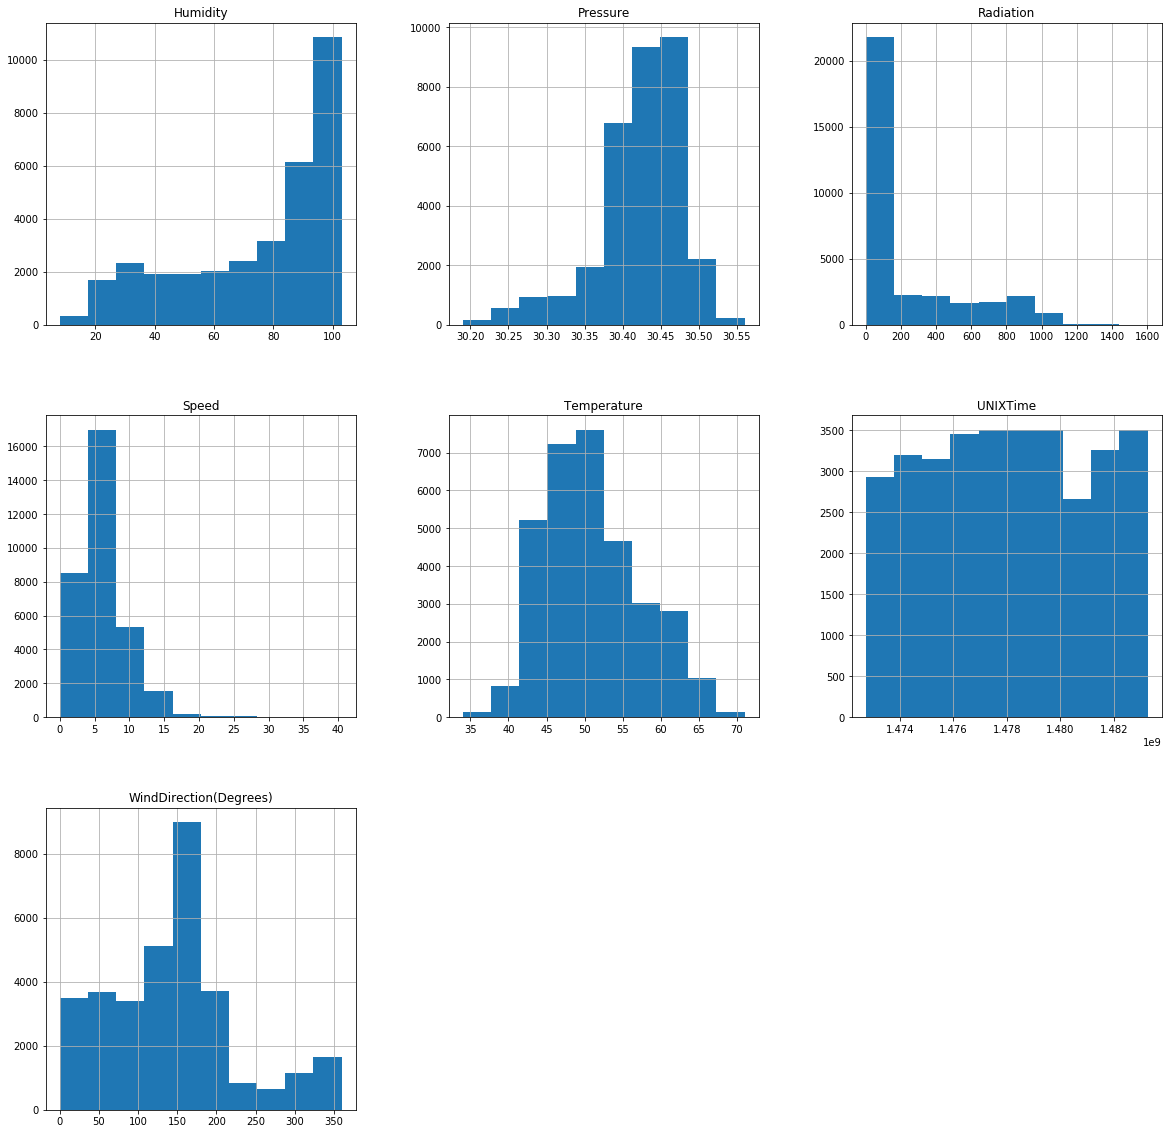

In [3]:
df.hist(figsize=(20,20))

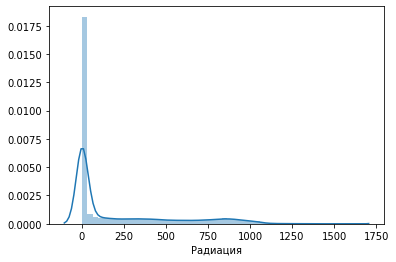

In [7]:
sns.distplot(df['Радиация'],kde=True, norm_hist=True) #вывод гистограммы Radiation

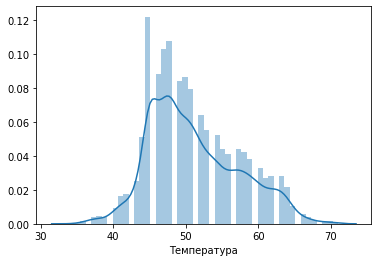

In [8]:
sns.distplot(df['Температура']) #вывод гистограммы Temperature

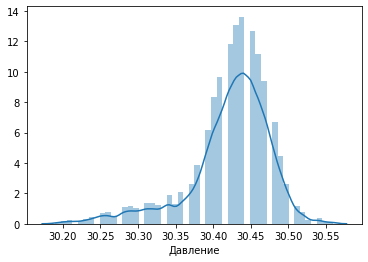

In [9]:
sns.distplot(df['Давление']) #вывод гистограммы Pressure

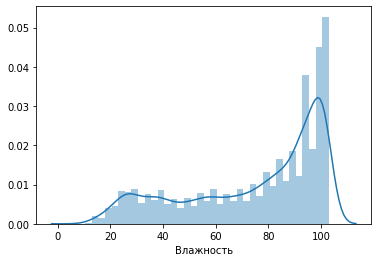

In [10]:
sns.distplot(df['Влажность']) #вывод гистограммы Humidity

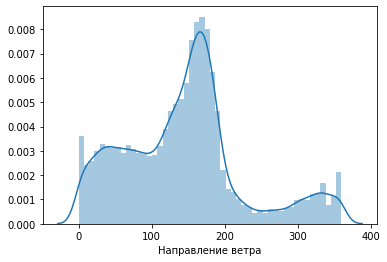

In [11]:
sns.distplot(df['Направление ветра']) #вывод гистограммы WindDirection(Degrees)

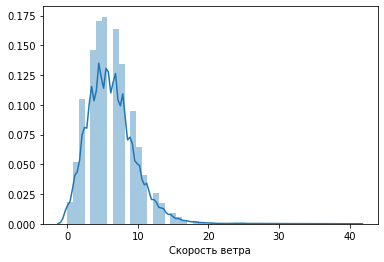

In [12]:
sns.distplot(df['Скорость ветра']) #вывод гистограммы Speed

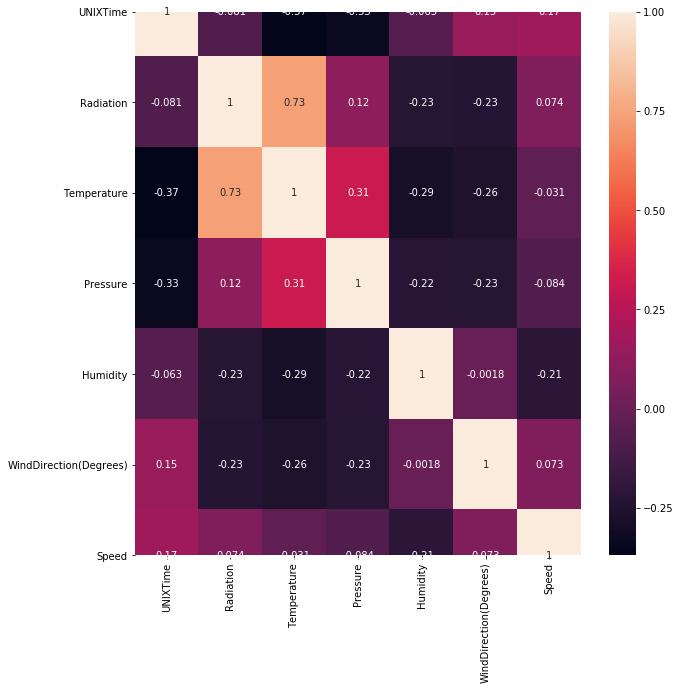

In [15]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

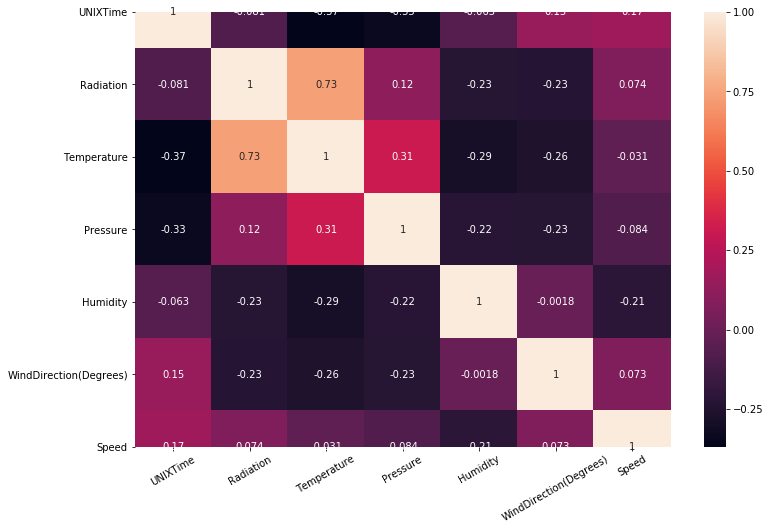

In [16]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True) # plot heatmap; annot=True shows the number, without it, there is no correlation value, just colors!
plt.xticks(rotation=30)
plt.show()

In [17]:
df.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


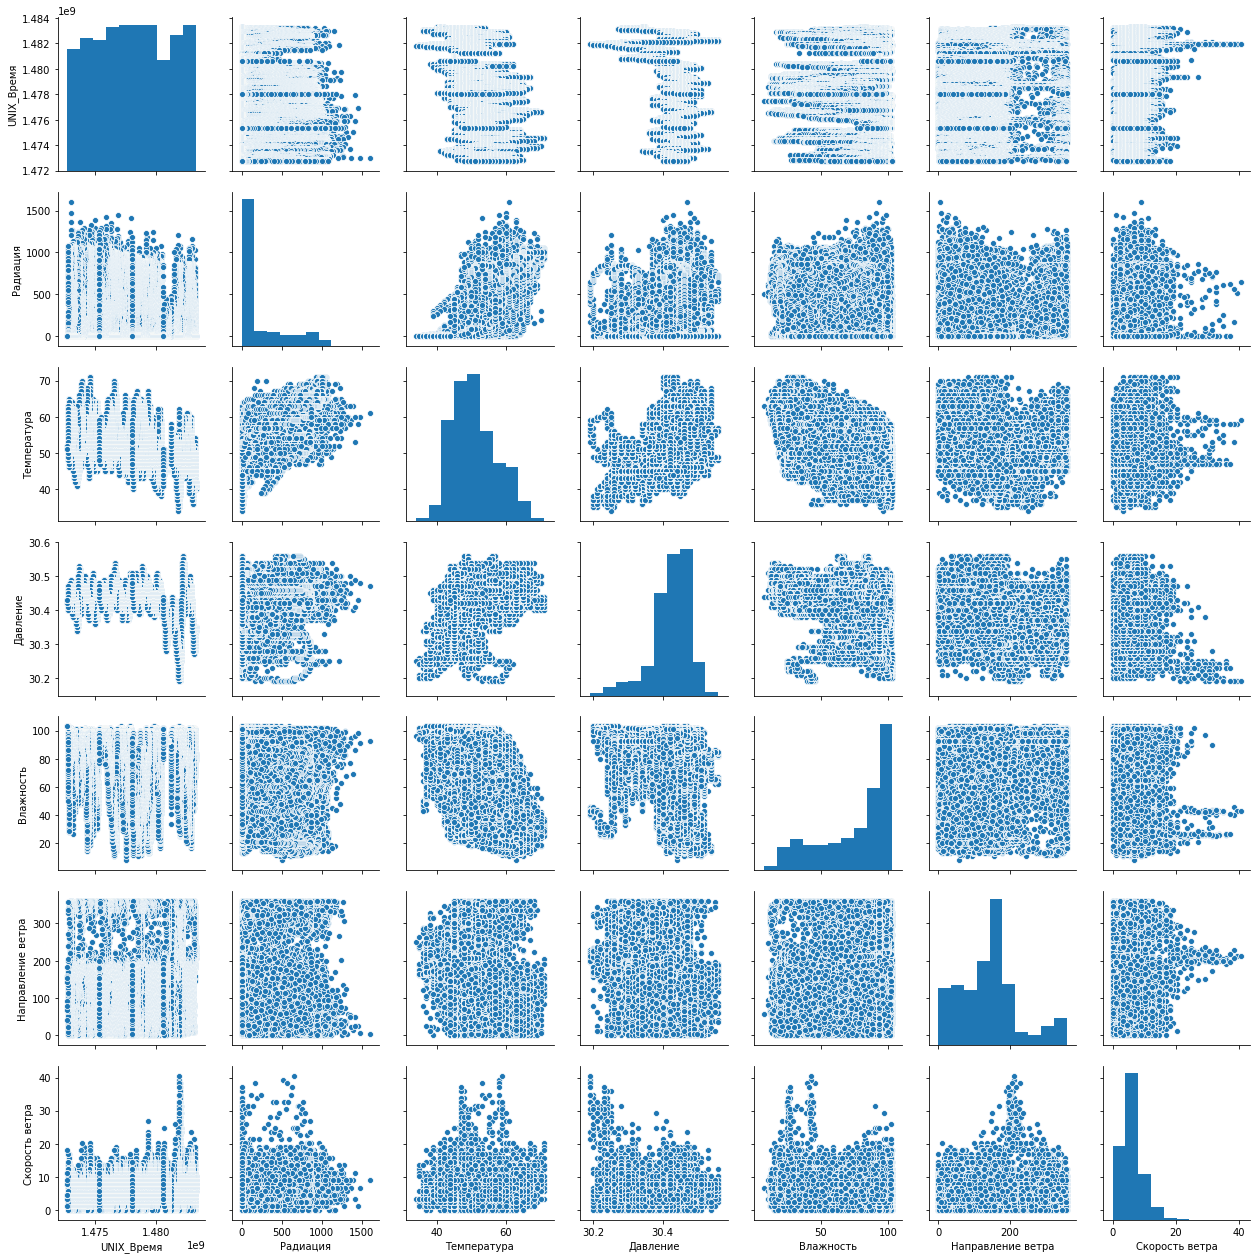

In [13]:
sns.pairplot(df) #вывод графиков pairplot

# Вторичный анализ

In [17]:
df1 = df #копирование набора данных в новую переменную для дальнейших преобразований

In [18]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
df1.index =  pd.to_datetime(df1['UNIX_Время'], unit='s')
df1.index = df1.index.tz_localize(pytz.utc).tz_convert(hawaii)
df1['Месяц_года'] = df1.index.strftime('%m').astype(int)
df1['День_года'] = df1.index.strftime('%j').astype(int)
df1['Неделя_года'] = df1.index.strftime('%U').astype(int)
df1['Час'] = df1.index.hour 
df1['Минута'] = df1.index.hour*60 + df1.index.minute
df1['Секунда'] = df1.index.hour*60*60 + df1.index.minute*60 + df1.index.second
df1['Время_восхода'] = pd.to_datetime(df1['Время_восхода'], format='%H:%M:%S')
df1['Время_заката'] = pd.to_datetime(df1['Время_заката'], format='%H:%M:%S')
df1['Продолжительность_дня(с)'] = df1['Время_заката'].dt.hour*60*60 \
                           + df1['Время_заката'].dt.minute*60 \
                           + df1['Время_заката'].dt.second \
                           - df1['Время_восхода'].dt.hour*60*60 \
                           - df1['Время_восхода'].dt.minute*60 \
                           - df1['Время_восхода'].dt.second
df1.drop(['Дата','Время','Время_восхода','Время_заката'], inplace=True, axis=1)
df1.head() #Преобразование признаков, содержащих значения времени, добавление новых признаков и удаление преобразованных старых

,UNIX_Время,Радиация,Температура,Давление,Влажность,Направление_ветра,Скорость_ветра,Месяц_года,День_года,Неделя_года,Час,Минута,Секунда,Продолжительность_дня(с)
UNIX_Время,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,1.21,48,30.46,59,177.39,5.62,9,273,39,23,1435,86126,43200
2016-09-29 23:50:23-10:00,1475229023,1.21,48,30.46,58,176.78,3.37,9,273,39,23,1430,85823,43200
2016-09-29 23:45:26-10:00,1475228726,1.23,48,30.46,57,158.75,3.37,9,273,39,23,1425,85526,43200
2016-09-29 23:40:21-10:00,1475228421,1.21,48,30.46,60,137.71,3.37,9,273,39,23,1420,85221,43200
2016-09-29 23:35:24-10:00,1475228124,1.17,48,30.46,62,104.95,5.62,9,273,39,23,1415,84924,43200


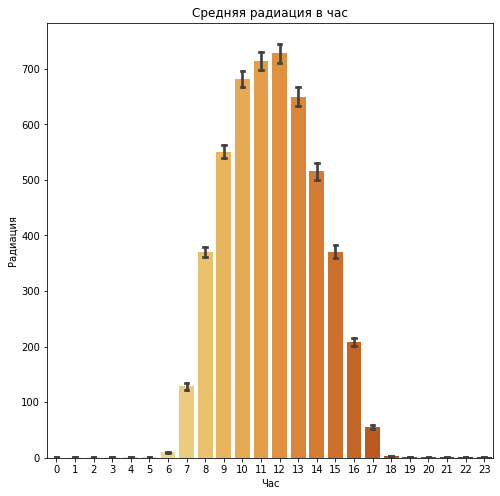

In [19]:
figure= plt.figure(figsize=(8,8))
ax = plt.axes()
sns.barplot(x="Час", y='Радиация', data=df1, palette="YlOrBr", capsize=.2, ax = ax)
ax.set_title('Средняя радиация в час')
plt.show() #вывод гистограммы распределения Radiation в течение суток

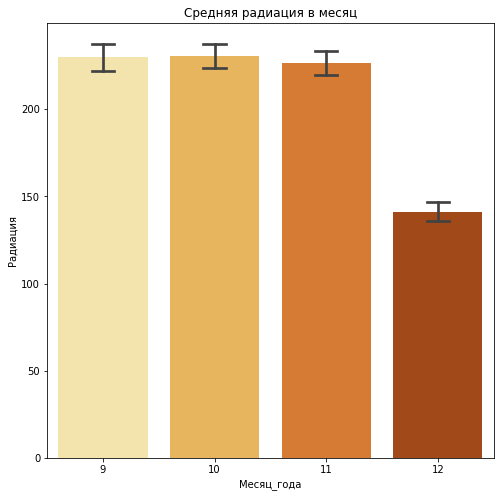

In [20]:
figure= plt.figure(figsize=(8,8))
ax = plt.axes()
sns.barplot(x="Месяц_года", y='Радиация', data=df1, palette="YlOrBr", capsize=.2, ax = ax)
ax.set_title('Средняя радиация в месяц')
plt.show() #вывод гистограммы распределения Radiation в течение 4 месяцев

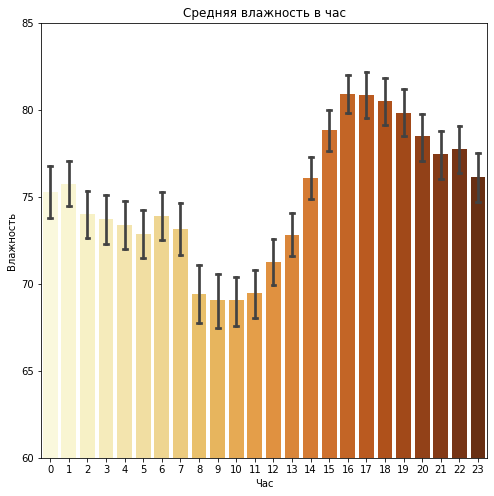

In [21]:
figure= plt.figure(figsize=(8,8))
ax = plt.axes()
sns.barplot(x="Час", y='Влажность', data=df1, palette=("YlOrBr"), capsize=.2, ax = ax)
ax.set_title('Средняя влажность в час')
ax.set_ylim(60,85)
plt.show() #вывод гистограммы распределения Humidity в течение суток

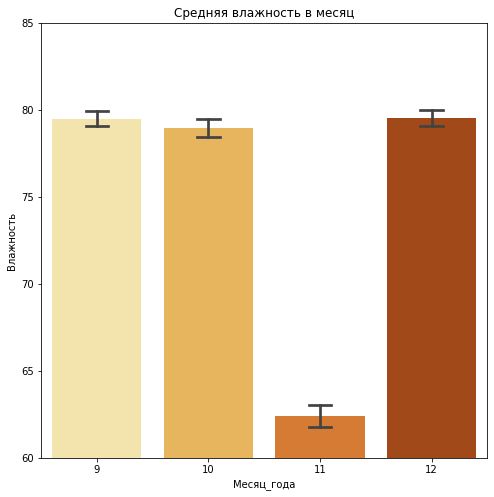

In [22]:
figure= plt.figure(figsize=(8,8))
ax = plt.axes()
sns.barplot(x="Месяц_года", y='Влажность', data=df1, palette=("YlOrBr"), capsize=.2, ax = ax)
ax.set_title('Средняя влажность в месяц')
ax.set_ylim(60,85)
plt.show() #вывод гистограммы распределения Humidity в течение 4 месяцев

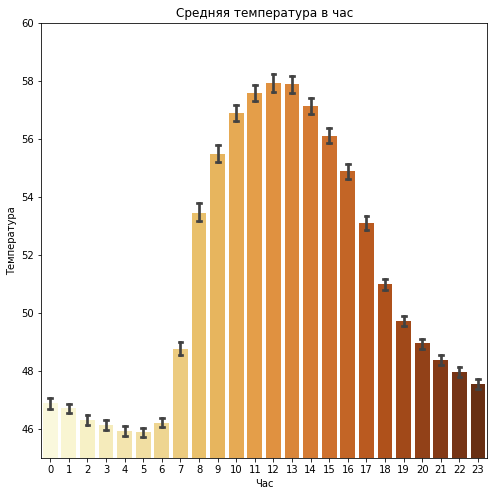

In [23]:
figure= plt.figure(figsize=(8,8))
ax = plt.axes()
sns.barplot(x="Час", y='Температура', data=df1, palette=("YlOrBr"), capsize=.2, ax = ax)
ax.set_title('Средняя температура в час')
ax.set_ylim(45,60)
plt.show() #вывод гистограммы распределения Temperature в течение суток

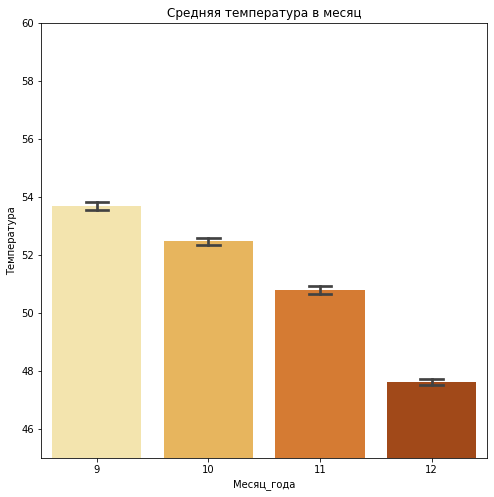

In [24]:
figure= plt.figure(figsize=(8,8))
ax = plt.axes()
sns.barplot(x="Месяц_года", y='Температура', data=df1, palette=("YlOrBr"), capsize=.2, ax = ax)
ax.set_title('Средняя температура в месяц')
ax.set_ylim(45,60)
plt.show()  #вывод гистограммы распределения Temperature в течение 4 месяцев

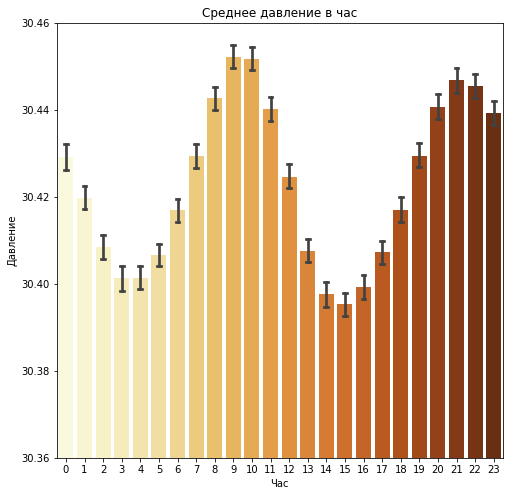

In [25]:
figure= plt.figure(figsize=(8,8))
ax = plt.axes()
sns.barplot(x="Час", y='Давление', data=df1, palette=("YlOrBr"), capsize=.2, ax = ax)
ax.set_title('Среднее давление в час')
ax.set_ylim(30.36,30.46)
plt.show() #вывод гистограммы распределения Pressure в течение суток

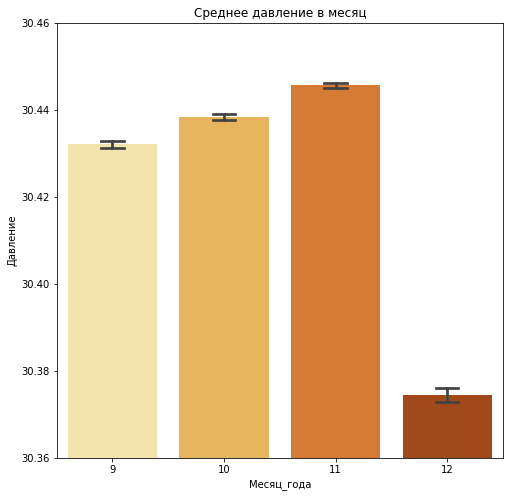

In [26]:
figure= plt.figure(figsize=(8,8))
ax = plt.axes()
sns.barplot(x="Месяц_года", y='Давление', data=df1, palette=("YlOrBr"), capsize=.2, ax = ax)
ax.set_title('Среднее давление в месяц')
ax.set_ylim(30.36,30.46)
plt.show()  #вывод гистограммы распределения Pressure в течение 4 месяцев

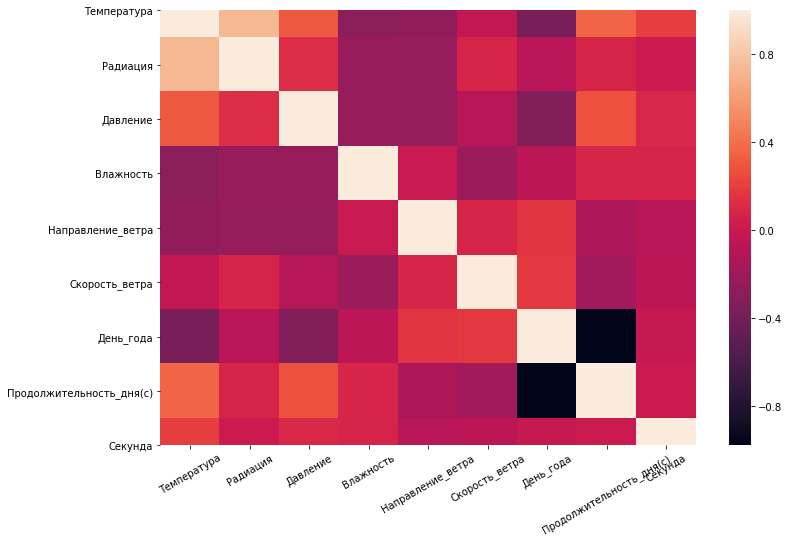

In [27]:
cols_heatmap=['Температура', 'Радиация', 'Давление', 'Влажность', 'Направление_ветра', 
              'Скорость_ветра', 'День_года', 'Продолжительность_дня(с)', 'Секунда']
corr_mat = df1.loc[:, cols_heatmap].corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_mat, annot=False) 
plt.xticks(rotation=30)
plt.show() #Вывод тепловой карты корреляции Пирсона

In [28]:
corr_mat #вывод матрицы корреляции Пирсона

,Температура,Радиация,Давление,Влажность,Направление_ветра,Скорость_ветра,День_года,Продолжительность_дня(с),Секунда
Температура,1.000000,0.734955,0.311173,-0.285055,-0.259421,-0.031458,-0.370794,0.355509,0.197227
Радиация,0.734955,1.000000,0.119016,-0.226171,-0.230324,0.073627,-0.081320,0.073456,0.004348
Давление,0.311173,0.119016,1.000000,-0.223973,-0.229010,-0.083639,-0.332762,0.278614,0.091066
Влажность,-0.285055,-0.226171,-0.223973,1.000000,-0.001833,-0.211624,-0.063760,0.087356,0.077851
Направление_ветра,-0.259421,-0.230324,-0.229010,-0.001833,1.000000,0.073092,0.153255,-0.129434,-0.077956
Скорость_ветра,-0.031458,0.073627,-0.083639,-0.211624,0.073092,1.000000,0.174336,-0.174944,-0.057908
День_года,-0.370794,-0.081320,-0.332762,-0.063760,0.153255,0.174336,1.000000,-0.978641,-0.007094
Продолжительность_дня(с),0.355509,0.073456,0.278614,0.087356,-0.129434,-0.174944,-0.978641,1.000000,0.007896
Секунда,0.197227,0.004348,0.091066,0.077851,-0.077956,-0.057908,-0.007094,0.007896,1.000000


# Разделяем зависимую и независисмые переменные и разделяем выборку

In [5]:
X = df1[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'Second']]
y = df1['Radiation']
#разделение признаков и целевой переменной в разные массивы

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) #построение обучающей и тестовой выборки

[18:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:28:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed d

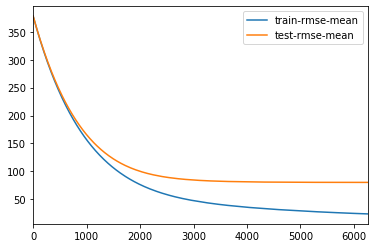

In [7]:
xgb_params = {
    'n_trees': 50, 
    'eta': 0.001,
    'max_depth': 12,
    'subsample': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=70000, early_stopping_rounds=50,
    verbose_eval=500, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()
plt.show() #создание объекта модели градиентного бустинга и поиск необходимого числа итераций

In [8]:
num_boost_rounds = len(cv_output)
print(num_boost_rounds)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

print("R^2 in training: %s"  % r2_score(dtrain.get_label(), model.predict(dtrain)))
print("R^2 in testing: %s"  % r2_score(y_test, model.predict(dtest)))
print('MAE:', metrics.mean_absolute_error(y_test, model.predict(dtest)))
print('MSE:', metrics.mean_squared_error(y_test, model.predict(dtest)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(dtest)))) #обучение и тестирование модели градиентного бустинга с последующим выводом метрик качества

6266
[18:36:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
R^2 in training: 0.9925990823563547
R^2 in testing: 0.9333371888082397
MAE: 30.552817200620822
MSE: 6625.048626446287
RMSE: 81.39440168983545


In [7]:
rf1 = RandomForestRegressor(n_jobs=-1, n_estimators=10000)

In [8]:
rf1.fit(X_train, y_train)
predictions = rf1.predict(X_test)
print(rf1.score(X=X_test, y=y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))  #создание объекта случайного леса, обучение регрессора, тестирование на тестовой выборке и вывод метрик качества

0.9310623456053291
MAE: 31.379839737029037
MSE: 6851.125903527679
RMSE: 82.77152833872091


In [28]:
MLP_regressor = MLPRegressor(random_state=1, max_iter=1000,  hidden_layer_sizes=(80,))

In [29]:
MLP_regressor.fit(X_train, y_train)
predictions = MLP_regressor.predict(X_test)
print(MLP_regressor.score(X=X_test, y=y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))  #создание объекта многослойного персептрона, обучение регрессора, тестирование на тестовой выборке и вывод метрик качества

0.8178334568136215
MAE: 84.76816087434837
MSE: 18103.98009243506
RMSE: 134.5510315547044


In [30]:
MLP_regressor = MLPRegressor(random_state=1, max_iter=500, alpha=5)
MLP_regressor.fit(X_train, y_train)
predictions = MLP_regressor.predict(X_test)
print(MLP_regressor.score(X=X_test, y=y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.8240696119239719
MAE: 76.25453709910742
MSE: 17484.2217877742
RMSE: 132.22791606833331


In [9]:
df2 = df1

In [10]:
df2['y_pred'] = model.predict(xgb.DMatrix(X))

In [12]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="Предсказание солнечной радиации",
           x_axis_label='Дата и время',
           y_axis_label='Солнечная радиация',
           x_axis_type="datetime")
p.x_range = Range1d(df2.index[0], df2.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))
p.line(df2.index, df2['Radiation'], legend='Истинные значения', line_width=1)
p.line(df2.index, df2['y_pred'], legend='Предсказанные значения', line_width=1, line_color="red")

show(p, notebook_handle = True) #выовд графика сравнения истинных и предсказанных значений для модели градиентного бустинга

Loading BokehJS ...

# Линейные модели

In [18]:
lin_reg = linear_model.LinearRegression(n_jobs=-1)

In [19]:
lin_reg = linear_model.LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
print(lin_reg.score(X=X_test, y=y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) #создание объекта линейного регрессора, обучение регрессора, тестирование на тестовой выборке и вывод метрик качества

0.6169524798893526
MAE: 147.69950725649937
MSE: 38067.82824793878
RMSE: 195.10978511581314


In [12]:
ridge_regressor = Ridge(alpha=1)
ridge_regressor.fit(X_train, y_train)
predictions = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X=X_test, y=y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) #создание объекта ридж регрессора, обучение регрессора, тестирование на тестовой выборке и вывод метрик качества

0.6169772759182185
MAE: 147.7104168855339
MSE: 38065.36398197035
RMSE: 195.10346993831337


In [9]:
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)
predictions = lasso_regressor.predict(X_test)
print(lasso_regressor.score(X=X_test, y=y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
pair_lasso = list(zip( X_train.columns, lasso_regressor.coef_))
pair_lasso #создание объекта лассо регрессора, обучение регрессора, тестирование на тестовой выборке и вывод метрик качества и пар признак - коэффициент

0.615087302305524
MAE: 148.9962951811352
MSE: 38253.192350785816
RMSE: 195.58423339008135


[('Temperature', 43.67821577063781),
 ('Pressure', -0.0),
 ('Humidity', 0.7056935353019064),
 ('WindDirection(Degrees)', -0.2373007694078511),
 ('Speed', 6.120351388368222),
 ('DayOfYear', 2.1520739817416126),
 ('Second', -0.002107334279169906)]

In [31]:
X1 = X.drop(['Pressure'], axis=1)
y1 = y #удаление признака Pressure из исходной выборки 

In [32]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 42) #разделение на обучающую и тестовую выборки

In [39]:
rf1 = RandomForestRegressor(n_jobs=-1, n_estimators=10000)
rf1.fit(X1_train, y1_train)
predictions = rf1.predict(X1_test)
print(rf1.score(X=X1_test, y=y1_test))
print('MAE:', metrics.mean_absolute_error(y1_test, predictions))
print('MSE:', metrics.mean_squared_error(y1_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions))) #создание объекта случайного лесса, обучение и тестирование модели с дальнейшим выводом метрик качества

0.9296153529405117
MAE: 32.05897608883998
MSE: 6994.930171531768
RMSE: 83.63569914535161


In [40]:
lin_reg.fit(X1_train, y1_train)
predictions = lin_reg.predict(X1_test)
print(lin_reg.score(X=X1_test, y=y1_test))
print('MAE:', metrics.mean_absolute_error(y1_test, predictions))
print('MSE:', metrics.mean_squared_error(y1_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions))) #создание объекта линейной регрессии, обучение и тестирование модели с дальнейшим выводом метрик качества

0.615087870024976
MAE: 149.0156712376872
MSE: 38253.13592998824
RMSE: 195.5840891534591


In [35]:
lasso_regressor = Lasso()
lasso_regressor.fit(X1_train, y1_train)
predictions = lasso_regressor.predict(X1_test)
print(lasso_regressor.score(X=X1_test, y=y1_test))
print('MAE:', metrics.mean_absolute_error(y1_test, predictions))
print('MSE:', metrics.mean_squared_error(y1_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions)))
pair_lasso = list(zip( X1_train.columns, lasso_regressor.coef_))
pair_lasso #создание объекта лассо регрессии, обучение и тестирование модели с дальнейшим выводом метрик качества и коэффициентов перед признаками

0.6150873145557474
MAE: 148.996303447037
MSE: 38253.19113334052
RMSE: 195.5842302777515


[('Temperature', 43.67825956857426),
 ('Humidity', 0.7056955254179472),
 ('WindDirection(Degrees)', -0.2373007499034532),
 ('Speed', 6.120328359312339),
 ('DayOfYear', 2.1520773002593123),
 ('Second', -0.002107336781100487)]

In [36]:
ridge_regressor = Ridge()
ridge_regressor.fit(X1_train, y1_train)
predictions = ridge_regressor.predict(X1_test)
print(ridge_regressor.score(X=X1_test, y=y1_test))
print('MAE:', metrics.mean_absolute_error(y1_test, predictions))
print('MSE:', metrics.mean_squared_error(y1_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions))) #создание объекта ридж регрессии, обучение и тестирование модели с дальнейшим выводом метрик качества

0.6150878577669537
MAE: 149.01565168573623
MSE: 38253.137148208596
RMSE: 195.58409226777263


In [41]:
MLP_regressor = MLPRegressor(random_state=1, max_iter=500, alpha=5)
MLP_regressor.fit(X1_train, y1_train)
predictions = MLP_regressor.predict(X1_test)
print(MLP_regressor.score(X=X1_test, y=y1_test))
print('MAE:', metrics.mean_absolute_error(y1_test, predictions))
print('MSE:', metrics.mean_squared_error(y1_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions))) #создание объекта многослойного персептрона, обучение и тестирование модели с дальнейшим выводом метрик качества

0.7480616559554505
MAE: 110.31403966248952
MSE: 25038.00470340502
RMSE: 158.23401879306806


[21:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed d

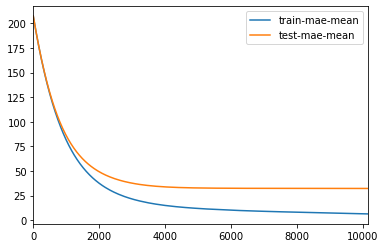

In [42]:
xgb_params = {
    'n_trees': 50, 
    'eta': 0.001,
    'max_depth': 12,
    'subsample': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1
}

dtrain = xgb.DMatrix(X1_train, y1_train)
dtest = xgb.DMatrix(X1_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=70000, early_stopping_rounds=50,
    verbose_eval=500, show_stdv=False)
cv_output[['train-mae-mean', 'test-mae-mean']].plot()
plt.show() #создание объекта модели градиентного бустинга и поиск необходимого числа итераций

In [43]:
num_boost_rounds = len(cv_output)
print(num_boost_rounds)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

print("R^2 in training: %s"  % r2_score(dtrain.get_label(), model.predict(dtrain)))
print("R^2 in testing: %s"  % r2_score(y1_test, model.predict(dtest)))
print('MAE:', metrics.mean_absolute_error(y1_test, model.predict(dtest)))
print('MSE:', metrics.mean_squared_error(y1_test, model.predict(dtest)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, model.predict(dtest)))) #обучение и тестирование модели градиентного бустинга с последующим выводом метрик качества

10160
[21:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
R^2 in training: 0.9963240467020819
R^2 in testing: 0.9327958183559578
MAE: 30.882482377363957
MSE: 6678.85082151081
RMSE: 81.72423643883624


In [39]:
X2 = X
y2 = y

In [40]:
scaler = MinMaxScaler()
scaler.fit(X2)
poly = PolynomialFeatures(2)
X2=scaler.transform(X2)
X2=poly.fit_transform(X2) #Создание отмастабированной выборки с добавлением полиномиальных признаков

In [41]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 42) #разделение новой выборки на тестовую и обучающую

In [47]:
lin_reg = linear_model.LinearRegression(n_jobs=-1)
lin_reg.fit(X2_train, y2_train)
predictions = lin_reg.predict(X2_test)
print(lin_reg.score(X=X2_test, y=y2_test))
print('MAE:', metrics.mean_absolute_error(y2_test, predictions))
print('MSE:', metrics.mean_squared_error(y2_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions))) #создание объекта линейной регрессии, обучение и тестирование модели с дальнейшим выводом метрик качества

0.7512883694533575
MAE: 111.88289724912104
MSE: 24717.32915064815
RMSE: 157.21745816113474


In [51]:
lasso_regressor = Lasso()
lasso_regressor.fit(X2_train, y2_train)
predictions = lasso_regressor.predict(X2_test)
print(lasso_regressor.score(X=X2_test, y=y2_test))
print('MAE:', metrics.mean_absolute_error(y2_test, predictions))
print('MSE:', metrics.mean_squared_error(y2_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions))) #создание объекта лассо регрессии, обучение и тестирование модели с дальнейшим выводом метрик качества

0.6773057200785444
MAE: 126.67363723479512
MSE: 32069.834105945414
RMSE: 179.0805240832889


In [52]:
rf1 = RandomForestRegressor(n_jobs=-1, n_estimators=10000)
rf1.fit(X2_train, y2_train)
predictions = rf1.predict(X2_test)
print(rf1.score(X=X2_test, y=y2_test))
print('MAE:', metrics.mean_absolute_error(y2_test, predictions))
print('MSE:', metrics.mean_squared_error(y2_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions))) #создание объекта случайного леса, обучение и тестирование модели с дальнейшим выводом метрик качества

0.9326650005343419
MAE: 31.34869160083219
MSE: 6691.851689819813
RMSE: 81.80373884988273


In [53]:
ridge_regressor = Ridge()
ridge_regressor.fit(X2_train, y2_train)
predictions = ridge_regressor.predict(X2_test)
print(ridge_regressor.score(X=X2_test, y=y2_test))
print('MAE:', metrics.mean_absolute_error(y2_test, predictions))
print('MSE:', metrics.mean_squared_error(y2_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions))) #создание объекта ридж регрессии, обучение и тестирование модели с дальнейшим выводом метрик качества

0.7501750432038982
MAE: 111.99329764855061
MSE: 24827.973157522538
RMSE: 157.56894731362058


In [54]:
MLP_regressor = MLPRegressor(random_state=1, max_iter=500, alpha=5)
MLP_regressor.fit(X2_train, y2_train)
predictions = MLP_regressor.predict(X2_test)
print(MLP_regressor.score(X=X2_test, y=y2_test))
print('MAE:', metrics.mean_absolute_error(y2_test, predictions))
print('MSE:', metrics.mean_squared_error(y2_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions))) #создание многослойного персептрона, обучение и тестирование модели с дальнейшим выводом метрик качества

0.8437888353594376
MAE: 80.18038353769691
MSE: 15524.496240648346
RMSE: 124.59733641072889


C:\Users\pda00\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[18:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:32:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:32:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed d

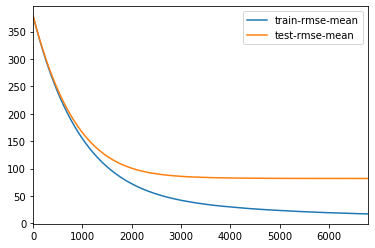

In [42]:
xgb_params = {
    'n_trees': 50, 
    'eta': 0.001,
    'max_depth': 12,
    'subsample': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(X2_train, y2_train)
dtest = xgb.DMatrix(X2_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=70000, early_stopping_rounds=50,
    verbose_eval=500, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()
plt.show() #создание объекта модели градиентного бустинга и поиск необходимого числа итераций

In [43]:
num_boost_rounds = len(cv_output)
print(num_boost_rounds)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

print("R^2 in training: %s"  % r2_score(dtrain.get_label(), model.predict(dtrain)))
print("R^2 in testing: %s"  % r2_score(y2_test, model.predict(dtest)))
print('MAE:', metrics.mean_absolute_error(y2_test, model.predict(dtest)))
print('MSE:', metrics.mean_squared_error(y2_test, model.predict(dtest)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, model.predict(dtest)))) #обучение и тестирование модели градиентного бустинга с последующим выводом метрик качества

6796
[18:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
R^2 in training: 0.995717233458058
R^2 in testing: 0.9332869501179236
MAE: 30.749960025247557
MSE: 6630.041421684334
RMSE: 81.42506629831095


In [5]:
d = {'col1': [1, 2], 'col2': [3, 4]}
dt = pd.DataFrame(data=d)
dt

,col1,col2
0,1,3
1,2,4


In [8]:
m = {'metric': ['R^2', 'MAE', 'MSE', 'RMSE'], 
     'linear': [0.6169524798893526, 147.69950725649937, 38067.82824793878, 195.10978511581314],
    'lasso': [0.615087302305524, 148.9962951811352, 38067.82824793878, 195.58423339008135],
    'ridge': [0.6169772759182185, 147.7104168855339, 38065.36398197035, 195.10346993831337],
    'random_forest': [0.9310623456053291, 31.379839737029037, 6851.125903527679, 82.77152833872091],
    'MLP': [0.8240696119239719, 76.25453709910742, 17484.2217877742, 132.22791606833331],
    'XGBoost': [0.9333371888082397, 30.552817200620822, 6625.048626446287, 81.39440168983545]}

In [3]:
m = {'metric': ['R^2', 'MAE', 'MSE', 'RMSE'], 
     'Лин_рег': [0.6169524798893526, 147.69950725649937, 38067.82824793878, 195.10978511581314],
    'Лассо': [0.615087302305524, 148.9962951811352, 38067.82824793878, 195.58423339008135],
    'Ридж': [0.6169772759182185, 147.7104168855339, 38065.36398197035, 195.10346993831337],
    'Случ_лес': [0.9310623456053291, 31.379839737029037, 6851.125903527679, 82.77152833872091],
    'MLP': [0.8240696119239719, 76.25453709910742, 17484.2217877742, 132.22791606833331],
    'XGBoost': [0.9333371888082397, 30.552817200620822, 6625.048626446287, 81.39440168983545]}

In [4]:
metrics_comparison = pd.DataFrame(data=m)
metrics_comparison.index = metrics_comparison['metric']
metrics_comparison.drop(['metric'], inplace=True, axis=1)

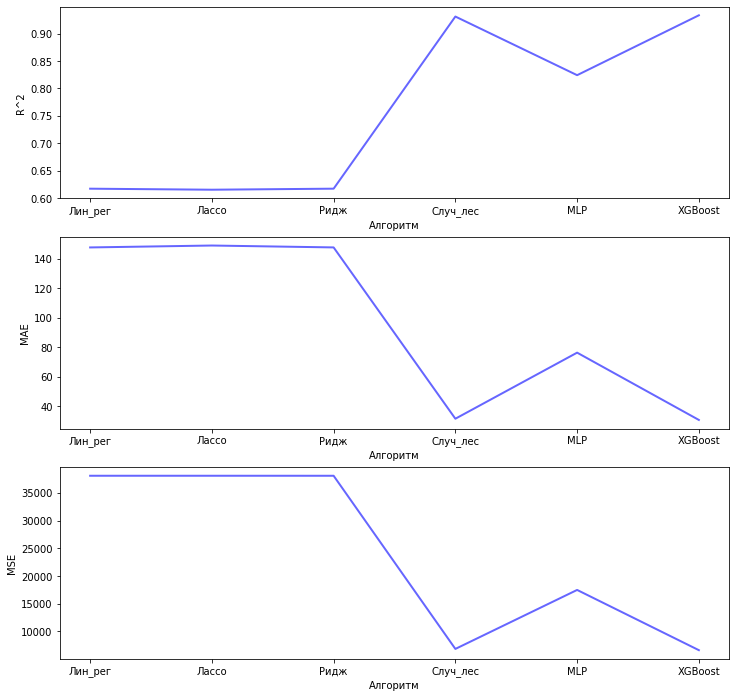

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
x = metrics_comparison.columns
y = [0.6169524798893526, 0.615087302305524, 0.6169772759182185, 0.9310623456053291, 0.8240696119239719, 0.9333371888082397]
axes[0].plot(x, y, 'b', lw=2, alpha=0.6)
axes[0].set_ylabel('R^2')
axes[0].set_xlabel('Алгоритм')

y = [147.69950725649937, 148.9962951811352, 147.7104168855339, 31.379839737029037, 76.25453709910742, 30.552817200620822]
axes[1].plot(x, y, 'b', lw=2, alpha=0.6)
axes[1].set_ylabel('MAE')
axes[1].set_xlabel('Алгоритм')

y = [38067.82824793878, 38067.82824793878, 38065.36398197035, 6851.125903527679, 17484.2217877742, 6625.048626446287]
axes[2].plot(x, y, 'b', lw=2, alpha=0.6)
axes[2].set_ylabel('MSE')
axes[2].set_xlabel('Алгоритм')

plt.show() #вывод графиков метрик качества алгоритмов по первому построению

In [51]:
metrics_comparison

,linear,lasso,ridge,random_forest,MLP,XGBoost
metric,,,,,,
R^2,0.616952,0.615087,0.616977,0.931062,0.824070,0.933337
MAE,147.699507,148.996295,147.710417,31.379840,76.254537,30.552817
MSE,38067.828248,38067.828248,38065.363982,6851.125904,17484.221788,6625.048626
RMSE,195.109785,195.584233,195.103470,82.771528,132.227916,81.394402


In [3]:
m2 = {'metric': ['R^2', 'MAE', 'MSE', 'RMSE'], 
     'linear_reg': [0.615087870024976, 149.0156712376872, 38253.13592998824, 195.5840891534591],
    'lasso_reg': [0.6150873145557474, 148.996303447037, 38253.19113334052, 195.5842302777515],
    'ridge_reg': [0.6150878577669537, 149.01565168573623, 38253.137148208596, 195.58409226777263],
    'random_forest': [0.9296153529405117, 32.05897608883998, 6994.930171531768, 83.63569914535161],
    'MLP_reg': [0.7480616559554505, 110.31403966248952, 25038.00470340502, 158.23401879306806],
    'XGBoost': [0.9327958183559578, 30.882482377363957, 6678.85082151081, 81.72423643883624]}

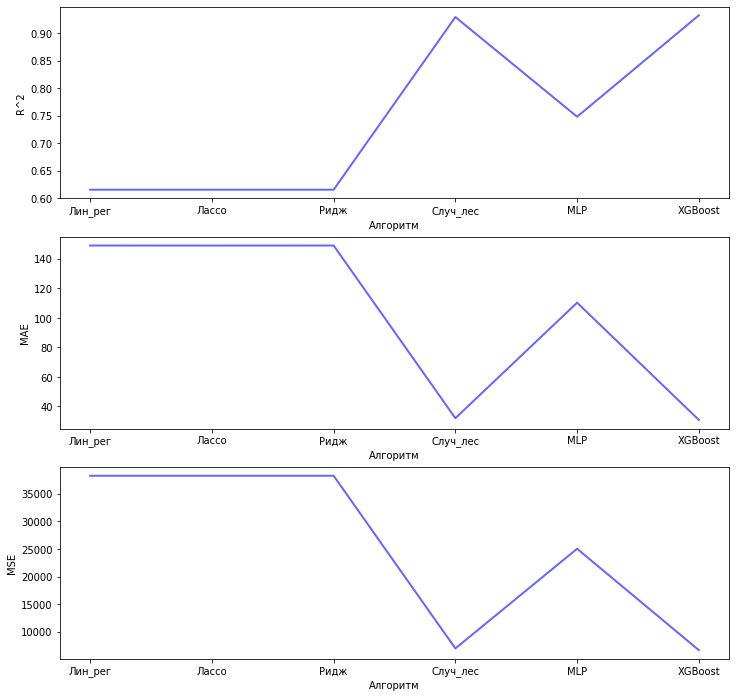

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
x = metrics_comparison.columns
y = [0.615087870024976, 0.6150873145557474, 0.6150878577669537, 0.9296153529405117, 0.7480616559554505, 0.9327958183559578]
axes[0].plot(x, y, 'b', lw=2, alpha=0.6)
axes[0].set_ylabel('R^2')
axes[0].set_xlabel('Алгоритм')

y = [149.0156712376872, 148.996303447037, 149.01565168573623, 32.05897608883998, 110.31403966248952, 30.882482377363957]
axes[1].plot(x, y, 'b', lw=2, alpha=0.6)
axes[1].set_ylabel('MAE')
axes[1].set_xlabel('Алгоритм')

y = [38253.13592998824, 38253.19113334052, 38253.137148208596, 6994.930171531768, 25038.00470340502, 6678.85082151081]
axes[2].plot(x, y, 'b', lw=2, alpha=0.6)
axes[2].set_ylabel('MSE')
axes[2].set_xlabel('Алгоритм')

plt.show() #вывод графиков метрик качества алгоритмов по второму построению

In [4]:
metrics_comparison_without_pressure = pd.DataFrame(data=m2)
metrics_comparison_without_pressure.index = metrics_comparison_without_pressure['metric']
metrics_comparison_without_pressure.drop(['metric'], inplace=True, axis=1)

In [14]:
metrics_comparison_without_pressure

,linear_reg,lasso_reg,ridge_reg,random_forest,MLP_reg,XGBoost
metric,,,,,,
R^2,0.615088,0.615087,0.615088,0.929615,0.748062,0.932796
MAE,149.015671,148.996303,149.015652,32.058976,110.314040,30.882482
MSE,38253.135930,38253.191133,38253.137148,6994.930172,25038.004703,6678.850822
RMSE,195.584089,195.584230,195.584092,83.635699,158.234019,81.724236


In [17]:
m3 = {'metric': ['R^2', 'MAE', 'MSE', 'RMSE'], 
     'linear_reg': [0.7512883694533575, 111.88289724912104, 24717.32915064815, 157.21745816113474],
    'lasso_reg': [0.6773057200785444, 126.67363723479512, 32069.834105945414, 179.0805240832889],
    'ridge_reg': [0.7501750432038982, 111.99329764855061, 24827.973157522538, 157.56894731362058],
    'random_forest': [0.9326650005343419, 31.34869160083219, 6691.851689819813, 81.80373884988273],
    'MLP_reg': [0.8437888353594376, 80.18038353769691, 15524.496240648346, 124.59733641072889],
    'XGBoost': [0.9332869501179236, 30.749960025247557, 6630.041421684334, 81.42506629831095]}

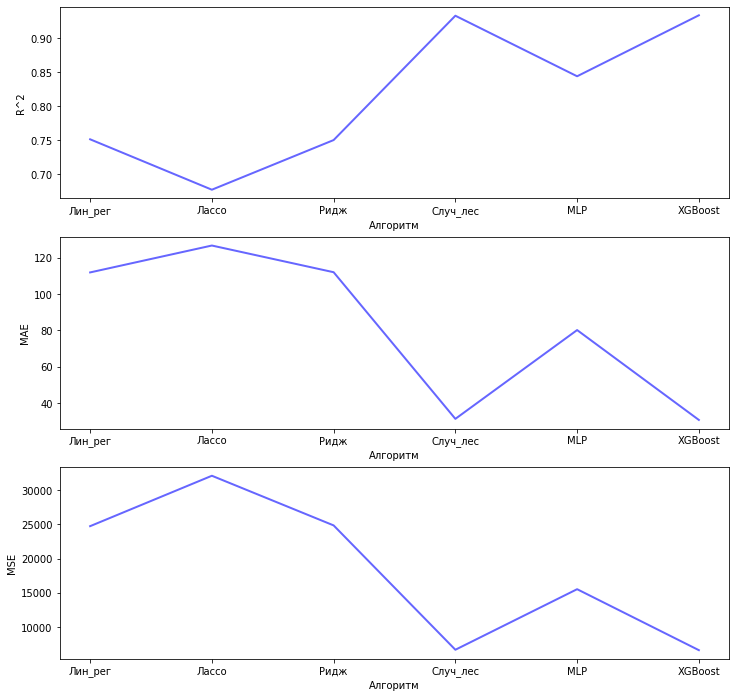

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
x = metrics_comparison.columns
y = [0.7512883694533575, 0.6773057200785444, 0.7501750432038982, 0.9326650005343419, 0.8437888353594376, 0.9332869501179236]
axes[0].plot(x, y, 'b', lw=2, alpha=0.6)
axes[0].set_ylabel('R^2')
axes[0].set_xlabel('Алгоритм')

y = [111.88289724912104, 126.67363723479512, 111.99329764855061, 31.34869160083219, 80.18038353769691, 30.749960025247557]
axes[1].plot(x, y, 'b', lw=2, alpha=0.6)
axes[1].set_ylabel('MAE')
axes[1].set_xlabel('Алгоритм')

y = [24717.32915064815, 32069.834105945414, 24827.973157522538, 6691.851689819813, 15524.496240648346, 6630.041421684334]
axes[2].plot(x, y, 'b', lw=2, alpha=0.6)
axes[2].set_ylabel('MSE')
axes[2].set_xlabel('Алгоритм')

plt.show() #вывод графиков метрик качества алгоритмов по третьему построению

In [18]:
metrics_comparison_poly_scaled = pd.DataFrame(data=m3)
metrics_comparison_poly_scaled.index = metrics_comparison_poly_scaled['metric']
metrics_comparison_poly_scaled.drop(['metric'], inplace=True, axis=1)

In [19]:
metrics_comparison_poly_scaled

,linear_reg,lasso_reg,ridge_reg,random_forest,MLP_reg,XGBoost
metric,,,,,,
R^2,0.751288,0.677306,0.750175,0.932665,0.843789,0.933287
MAE,111.882897,126.673637,111.993298,31.348692,80.180384,30.749960
MSE,24717.329151,32069.834106,24827.973158,6691.851690,15524.496241,6630.041422
RMSE,157.217458,179.080524,157.568947,81.803739,124.597336,81.425066
